In [72]:
################################################
#
#   CORRELATION AND LEAST SQUARE REGRESSION
#
#
from IPython.display import Image
from IPython.core.display import HTML 
from scipy.stats import binom
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
ds1_file = "Datasets/heights_fathers_vs_sons.txt"

In [13]:
df1 = pd.read_csv(ds1_file,sep='\t')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


Average Fathers Height: 67.68682745825602
Average Fathers Height: 68.68423005565863
The standard deviationof the Heights for the fathers is: 2.745827077877219
The standard deviation of the Heights for the fathers is: 2.8161940362006694


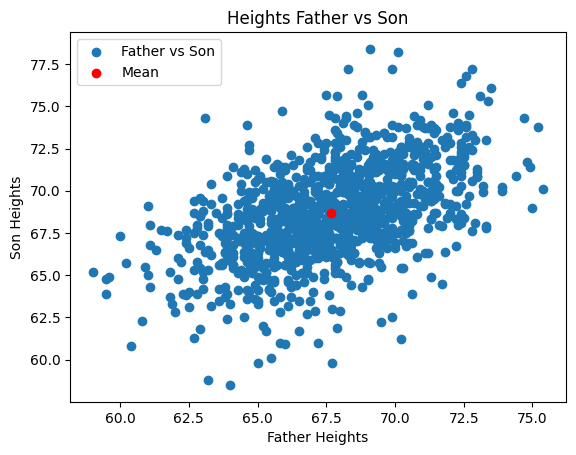

<Figure size 1000x1000 with 0 Axes>

In [76]:
x_values = df1['Father']
y_values = df1['Son']
fig, ax = plt.subplots()
ax.scatter(x_values,y_values)
plt.title("Heights Father vs Son")
plt.xlabel("Father Heights")
plt.ylabel("Son Heights")
plt.figure(figsize=(10,10))
print(f"Average Fathers Height: {x_mean}")
print(f"Average Fathers Height: {y_mean}")
print(f"The standard deviationof the Heights for the fathers is: {x_values.std()}")
print(f"The standard deviation of the Heights for the fathers is: {y_values.std()}")
ax.scatter([x_mean],[y_mean],color='red')
ax.legend(['Father vs Son', 'Mean'])
plt.show()

In [37]:
#
# The (Pearson's) correlation coefficient 
from scipy.stats import pearsonr
help(pearsonr)

Help on function pearsonr in module scipy.stats._stats_py:

pearsonr(x, y, *, alternative='two-sided', method=None)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelated system
    producing 

In [77]:

#
# The correlation coefficient is symmetric
# the actual formula to compute it:
#
#         cov(X,Y)          1        N     X_i -X_n         Y_i -Y_n
#  R =  ------------  ==   --- * Sum    ( ---------- ) * ( ---------- )
#        S_x * S_y          N      i=1        S_x              S_y
#
# where Sx,Sy are the standard deviations
# The correlation coefficient is a measure of how much Y changes based on a change in X:
# if X changes 1 * S_x, then Y will change  1 * R * S_y
heights_ro = pearsonr(x_values, y_values)[0]
print(f"The correlation coefficient between X,Y is : {heights_ro}")
print(f"The correlation coefficient between Y,X is : {pearsonr(y_values, x_values)[0]}")



The correlation coefficient between X,Y is : 0.5011626808075912
The correlation coefficient between Y,X is : 0.5011626808075912


In [75]:
#
# Exercise 1
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, 0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, 1.72, 2.03, 2.02, 2.02, 2.02])
Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, 93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, 840.0, 801.0, 519.0])
N = 24
X_mean = Xs.mean()
Y_mean = Ys.mean()
print("The dataset X mean is: ",X_mean)
print("The dataset Y mean is: ",Y_mean)
print("-------")
#
# using ddof = 1 we get the unbiased value, i.e. divided by N-1 instead of N
Xs_var = Xs.std(ddof=1)
Ys_var = Ys.std(ddof=1)
print("The dataset X unbiased standard deviation is: ",Xs_var)
print("The dataset X unbiased standard deviation is: ", Ys_var)
print("-------")
#
# covariance as result of numpy function
# Note that numpy returns the covariance matrix; in this case we have 2 dimensions/variables so it's a 2 x 2 matrix
# in the diagonal we will have the variance, i.e. cov(X,X) and cov(Y,Y) outside the diagonal we have cov(X,Y) and cov(Y,X)
print(f"The covariance between X,Y via numpy function is : {np.cov(Xs, Ys,ddof=1)[0][1]}")
#
# we want to compare with the result we get from the actual covariance formula (note)
covariance = sum([ (x-X_mean) * (y-Y_mean)  for x,y in zip(Xs,Ys) ]) / (N-1)
print("The unbiased covariance found manually is: ", covariance)
print("-------")
#
###################################################### EXERCISE 1 PART 2
# 
print(f"The correlation coefficient between X,Y given by scipy is : {pearsonr(Xs, Ys)[0]}")
print(f"The unbiased correlation coefficient found manually is: ", covariance/(Xs_var * Ys_var))
#
# find correlation coefficient for data that have quadratic relation Y = X^2
# Note that the value of the coefficient depends on the distribution of the X values
a_start = [-10, 0, 5 ]
a_stop =  [10, 20, 50]
print(f"The correlation coefficient between X,Y where Y = X^2 (given by scipy) is :")
for start in a_start:
    for stop in a_stop:
        a_values = np.arange(start,stop,0.5)
        b_values = np.square(a_values)
        #
        # we only print 4 floating digits
        print(f"{pearsonr(a_values, b_values)[0]:.4f} when the X is between [{start}, {stop}]")
print("-------------")
#
# find correlation coefficient for data that have quadratic relation Y = X^2
# when X follows a Normal distribution N(0,1)
Xs = np.random.normal(0, 1, 100)
Ys = np.square(Xs)
print(f"When X follows a normal distribution and Y = X^2, the correlation coefficient is {pearsonr(Xs, Ys)[0]:.6f} ")
print("Note: the answer should be zero here because of this (but remember IF R = 0 DOES NOT MEAN THE VARS ARE INDEPENDENT!!): ")
Image(url="pictures/Correlation_exercise.png")



The dataset X mean is:  0.9199250000000001
The dataset Y mean is:  425.6175
-------
The dataset X unbiased standard deviation is:  0.6533948258734996
The dataset X unbiased standard deviation is:  348.7336574977229
-------
The covariance between X,Y via numpy function is : 191.20706528260865
The unbiased covariance found manually is:  191.20706528260868
-------
The correlation coefficient between X,Y given by scipy is : 0.8391399162310662
The unbiased correlation coefficient found manually is:  0.8391399162310663
The correlation coefficient between X,Y where Y = X^2 (given by scipy) is :
-0.0965 when the X is between [-10, 10]
0.7752 when the X is between [-10, 20]
0.9310 when the X is between [-10, 50]
0.9653 when the X is between [0, 10]
0.9668 when the X is between [0, 20]
0.9676 when the X is between [0, 50]
0.9962 when the X is between [5, 10]
0.9878 when the X is between [5, 20]
0.9780 when the X is between [5, 50]
-------------
When X follows a normal distribution and Y = X^2, t

Average Fathers Height: 67.68682745825602
Average Fathers Height: 68.68423005565863
The standard deviation of the Heights for the fathers is: 2.745827077877219
The standard deviation of the Heights for the fathers is: 2.8161940362006694
The coefficient of the regression line is: 0.5140059125455929
The intercept of the regression line is: 33.892800540661604


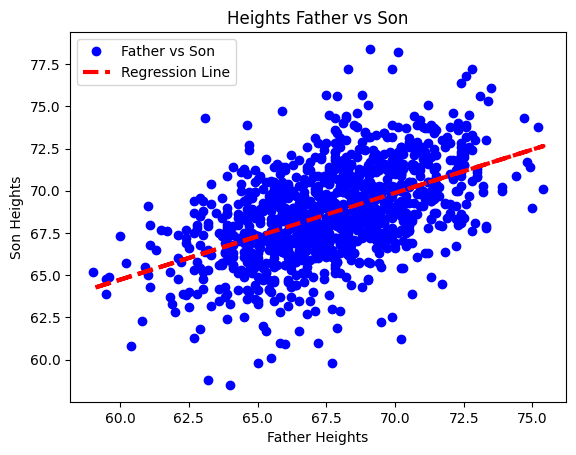

<Figure size 1000x1000 with 0 Axes>

In [89]:
#
# this is the same as before but here we also draw in red the linear regression line
fig, ax = plt.subplots()
plt.title("Heights Father vs Son")
plt.xlabel("Father Heights")
plt.ylabel("Son Heights")
plt.figure(figsize=(10,10))
print(f"Average Fathers Height: {x_mean}")
print(f"Average Fathers Height: {y_mean}")
print(f"The standard deviation of the Heights for the fathers is: {x_values.std()}")
print(f"The standard deviation of the Heights for the fathers is: {y_values.std()}")
#
# numpy will run a data fit a on polynomial of degree 1 (i.e. a line)
(m, b) = np.polyfit(x_values, y_values, 1)
print(f"The coefficient of the regression line is: {m}")
print(f"The intercept of the regression line is: {b}")
# 
# Here we create a function that that will take in: x and returns an estimate for y
# poly1d_fn is the name we give to the function
poly1d_fn = np.poly1d((m, b)) 
#
#
ax.plot(x_values,y_values, 'bo',                            # first set of data using 'bo': blue dots
         x_values, poly1d_fn(x_values), '--r', linewidth=3) # second set of data using '--k'=black dashed line
ax.legend(['Father vs Son', 'Regression Line'])
plt.show()

In [111]:
# Another wasy to ger regression parameter (also follow up exercise)
#
# METHOD 1
print("------ Alternative ways to get linear regression values using Exercise 1 data")
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, 0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, 1.72, 2.03, 2.02, 2.02, 2.02])
Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, 93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, 840.0, 801.0, 519.0])
N = 24
print("\n\n1) Results on X_values, Y_values from scipy function linregress")
from scipy.stats import linregress
l = linregress(Xs,Ys)
for i,value in enumerate(l):
    # tis gets the name of the field based on the index and the matching value
    print(f"{l._fields[i]:12}: {value}")
#
# METHOD 2    
print("\n\n---------------------")
print("2) Results on X_values, Y_values from scipy function linregress")
import statsmodels.api as sm
model = sm.OLS(Ys, sm.add_constant(Xs))
results = model.fit()

print(results.params)
print(results.summary())    


------ Alternative ways to get linear regression values using Exercise 1 data


1) Results on X_values, Y_values from scipy function linregress
slope       : 447.87059914099837
intercept   : 13.610139085217043
rvalue      : 0.8391399162310663
pvalue      : 2.994565602899751e-07
stderr      : 61.89254821132255


---------------------
2) Results on X_values, Y_values from scipy function linregress
[ 13.61013909 447.87059914]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     52.36
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.99e-07
Time:                        18:23:40   Log-Likelihood:                -159.43
No. Observations:                  24   AIC:                             322.9
Df Residuals:       

In [114]:
l = linregress(Xs,Ys)
for i,value in enumerate(l):
    # tis gets the name of the field based on the index and the matching value
    print(f"{l._fields[i]:12}: {value}")
print("---------")

l = linregress(Ys,Xs)
for i,value in enumerate(l):
    # tis gets the name of the field based on the index and the matching value
    print(f"{l._fields[i]:12}: {value}")


slope       : 447.87059914099837
intercept   : 13.610139085217043
rvalue      : 0.8391399162310663
pvalue      : 2.994565602899751e-07
stderr      : 61.89254821132255
---------
slope       : 0.0015722304620192293
intercept   : 0.25075620133153076
rvalue      : 0.8391399162310663
pvalue      : 2.994565602899751e-07
stderr      : 0.0002172711266523664
